## Regressão linear simples

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [3]:
base_plano_saude  = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [5]:
x_plano_saude = base_plano_saude.iloc[:, 0].values
x_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [6]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [7]:
np.corrcoef(x_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [9]:
x_plano_saude = x_plano_saude.reshape(-1, 1)
x_plano_saude.shape

(10, 1)

In [13]:
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)

LinearRegression()

In [15]:
regressor_plano_saude.intercept_

-558.9490909090907

In [16]:
regressor_plano_saude.coef_

array([61.86787879])

In [18]:
previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [21]:
grafico = px.scatter(x= x_plano_saude.ravel(), y= y_plano_saude)
grafico.add_scatter(x= x_plano_saude.ravel(), y= previsoes, name='Regressão')
grafico.show()

In [25]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40


array([1915.76606061])

In [26]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [28]:
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879173

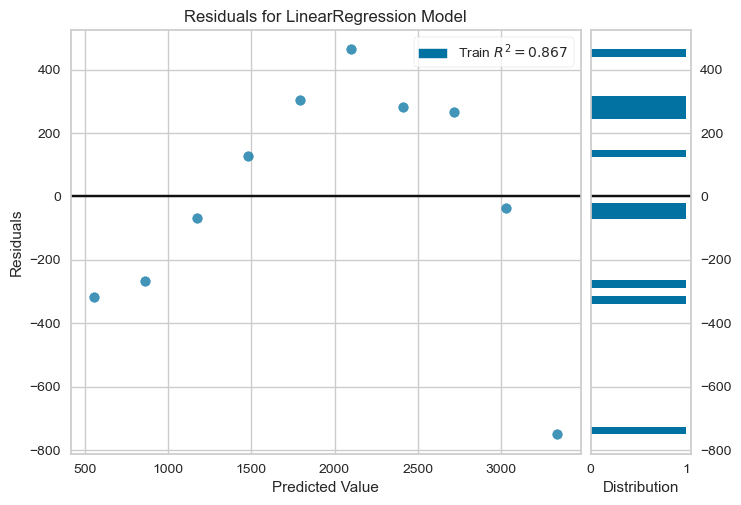

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
visualisador = ResidualsPlot(regressor_plano_saude)
visualisador.fit(x_plano_saude, y_plano_saude)
visualisador.poof()

Aplicando na base dos preços das casas

In [2]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [41]:
base_casas.corr()

C:\Users\isach\AppData\Local\Temp\ipykernel_7140\4101421808.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


C:\Users\isach\AppData\Local\Temp\ipykernel_7140\3367918029.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

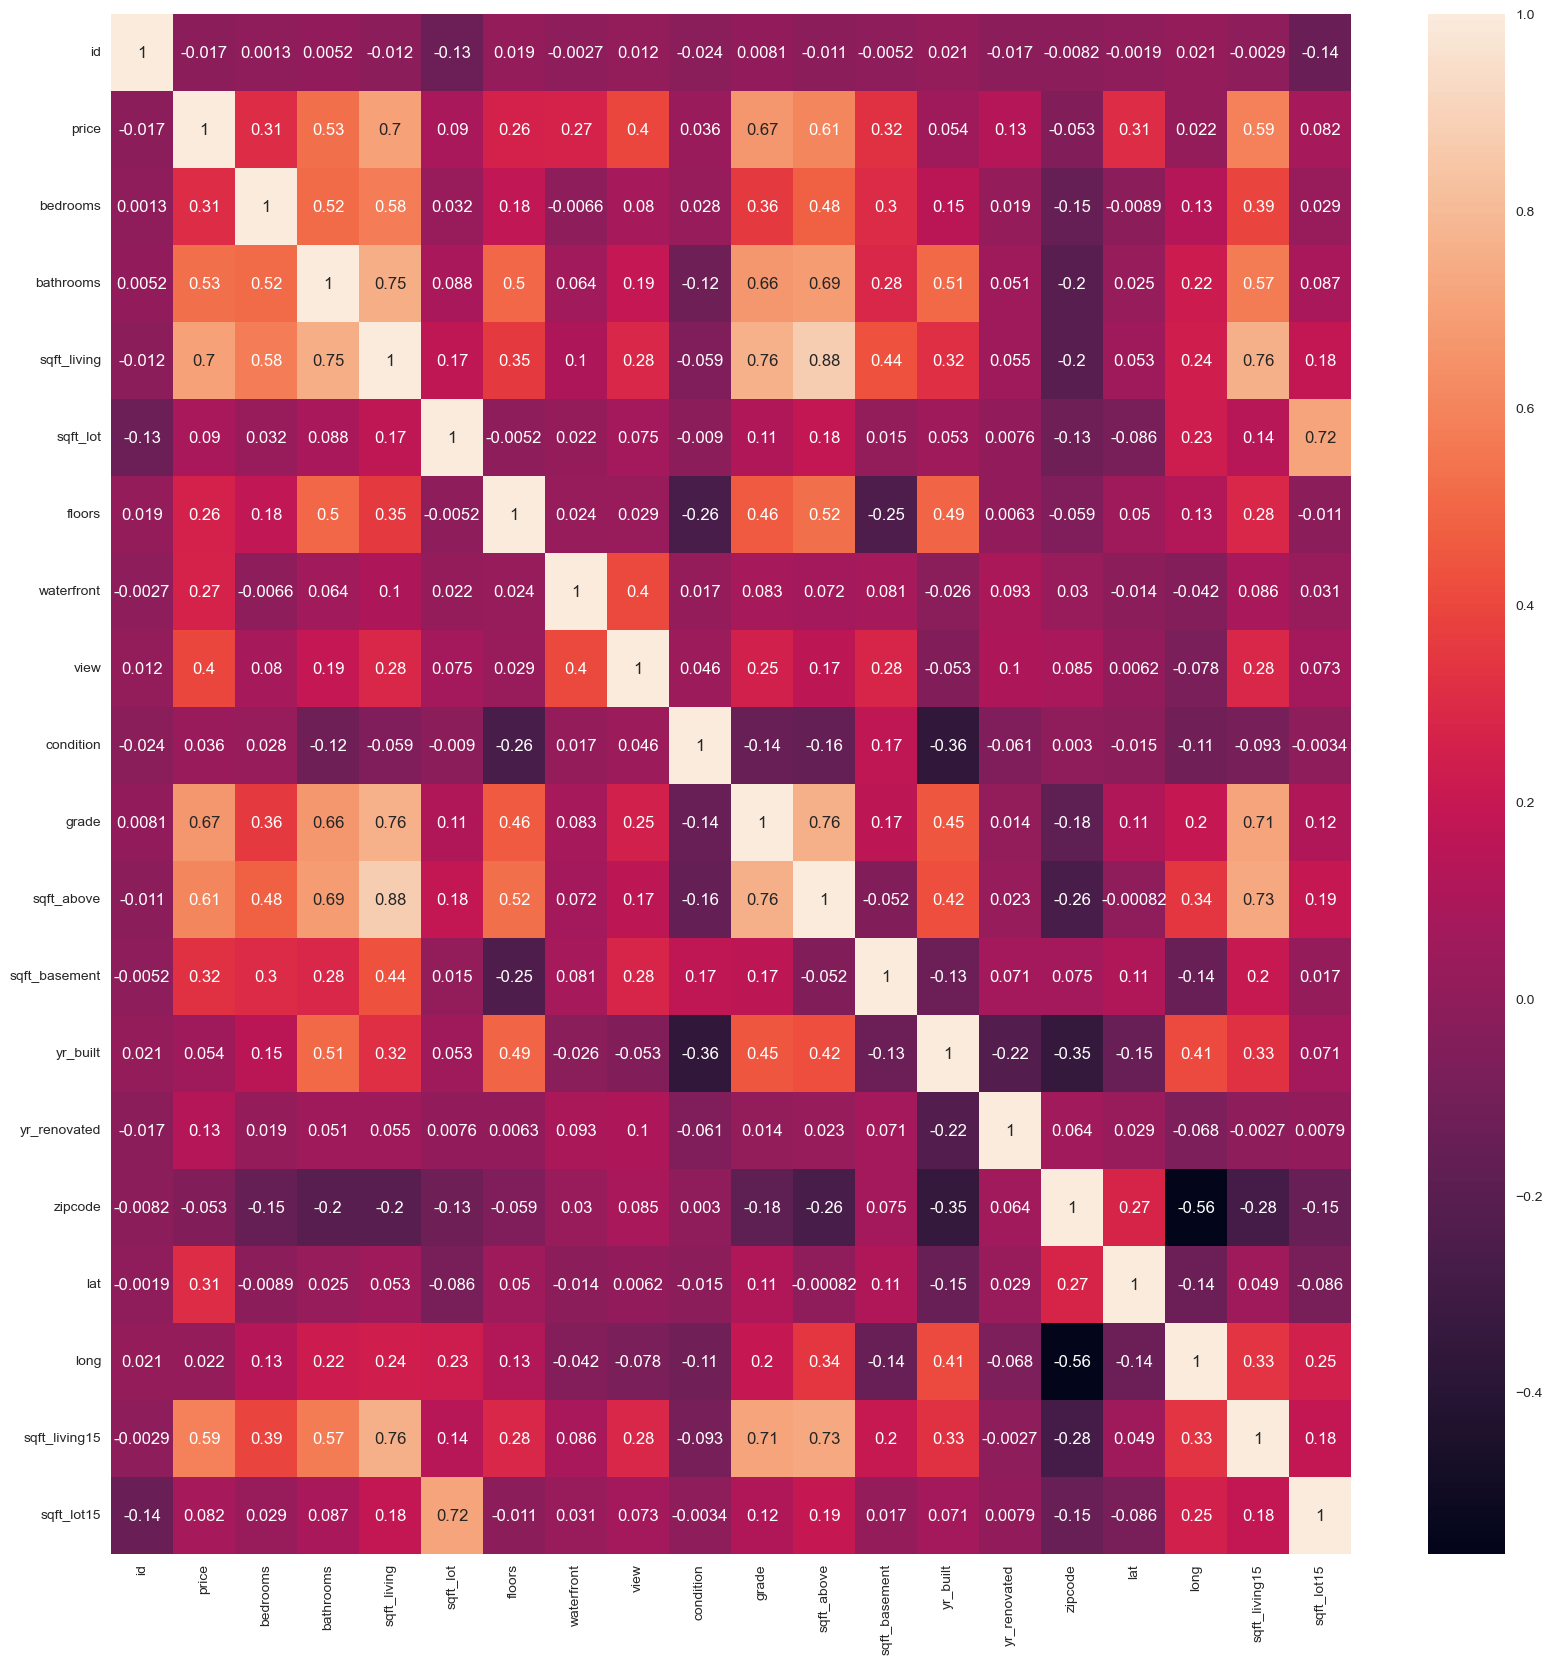

In [46]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(), annot=True)

In [4]:
x_casas = base_casas.iloc[:, 5:6].values
x_casas


array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [5]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [6]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size=0.3)

In [7]:
x_casas_treinamento.shape, y_casas_treinamento.shape, x_casas_teste.shape, y_casas_teste.shape

((15129, 1), (15129,), (6484, 1), (6484,))

In [15]:
from sklearn.linear_model import LinearRegression
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(x_casas_treinamento, y_casas_treinamento)


LinearRegression()

In [16]:
regressor_simples_casas.intercept_

-38567.23995680921

In [13]:
regressor_simples_casas.coef_

array([277.75894882])

In [18]:
regressor_simples_casas.score(x_casas_treinamento, y_casas_treinamento)

0.4912005140210648

In [19]:
regressor_simples_casas.score(x_casas_teste, y_casas_teste)

0.49600192954141764

In [20]:
previsoes = regressor_simples_casas.predict(x_casas_treinamento)
previsoes

array([ 255857.24579534,  544726.55257103,  205860.63500724, ...,
       1091911.68175191,  825263.09088204,  530838.60512989])

In [21]:
grafico = px.scatter(x=x_casas_treinamento.ravel(), y= previsoes)

grafico


In [73]:
grafico1 = px.scatter(x=x_casas_treinamento.ravel(), y= y_casas_treinamento)
grafico2 = px.line(x= x_casas_treinamento.ravel(), y= previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3

### Métricas de erros implementação

In [26]:
previsoes_teste = regressor_simples_casas.predict(x_casas_teste)
previsoes_teste


array([626109.92457611, 525283.42615344, 694716.38493533, ...,
       722492.27981761, 611388.7002885 , 622499.05824141])

In [23]:
y_casas_teste

array([ 400000.,  295000., 1220000., ...,  585444.,  290000.,  360000.])

In [24]:
abs(y_casas_teste - previsoes_teste).mean()

176683.21950940537

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [28]:
mean_absolute_error(y_casas_teste, previsoes_teste)

176683.21950940537

In [29]:
np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

271336.70855079294

In [30]:
grafico1 = px.scatter(x=x_casas_teste.ravel(), y= y_casas_teste)
grafico2 = px.line(x= x_casas_teste.ravel(), y= previsoes_teste)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3

## Regressão Linear múltipla

In [31]:
x_casas = base_casas.iloc[:, 3:19].values

In [32]:
y_casas = base_casas.iloc[:, 2].values

In [33]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size= 0.3, random_state= 0)

In [34]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [35]:
regressor_multiplo_casas.intercept_

5736222.703399853

In [36]:
regressor_multiplo_casas.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604121e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565320e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [37]:
regressor_multiplo_casas.score(x_casas_treinamento, y_casas_treinamento)

0.7029888085955012

In [38]:
regressor_multiplo_casas.score(x_casas_teste, y_casas_teste)

0.6885414149062088

In [40]:
previsoes = regressor_multiplo_casas.predict(x_casas_teste)
previsoes

array([ 383751.77768687, 1514216.17517462,  546921.96179108, ...,
        314968.57623299,  219405.55573555,  148128.8346705 ])

In [104]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_casas_teste, previsoes)

123888.44377484322

In [108]:
mean_squared_error(y_casas_teste, previsoes)

42760757001.544266

In [109]:
np.sqrt(mean_squared_error(y_casas_teste, previsoes))

206786.7428089728